<a href="https://colab.research.google.com/github/pandashreyan/ML-projects/blob/main/Youadview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib.cm

ERROR: Could not find a version that satisfies the requirement matplotlib.cm (from versions: none)
ERROR: No matching distribution found for matplotlib.cm


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyanpanda","key":"387133113020b193d088332453430d6b"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d sidharth178/youtube-adview-dataset

Dataset URL: https://www.kaggle.com/datasets/sidharth178/youtube-adview-dataset
License(s): unknown
100% 435k/435k [00:00<00:00, 1.11MB/s]
100% 435k/435k [00:00<00:00, 1.11MB/s]


In [17]:
!unzip /content/youtube-adview-dataset.zip

Archive:  /content/youtube-adview-dataset.zip
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [9]:
path = "/content/train - train.csv"
data_train = pd.read_csv(path)
df=data_train

In [10]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


<ipython-input-14-45cd2d34f72b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data_train, x='adview', y='category', inner='box', palette='Dark2')


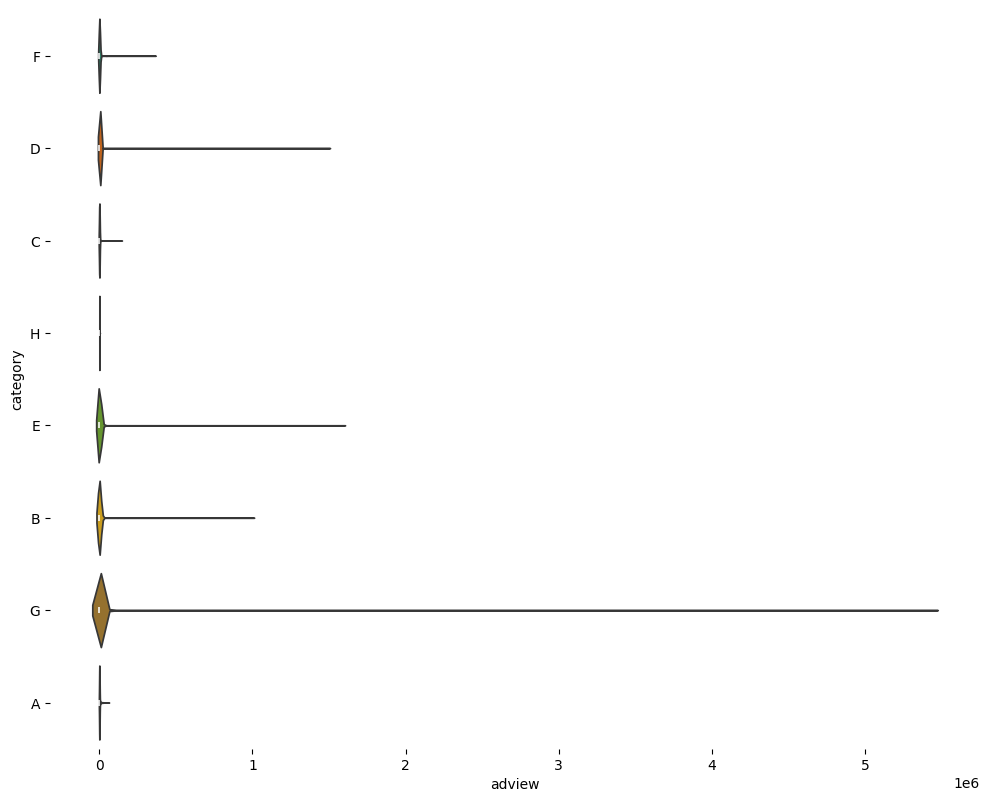

In [14]:
# @title category vs adview

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_train['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_train, x='adview', y='category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

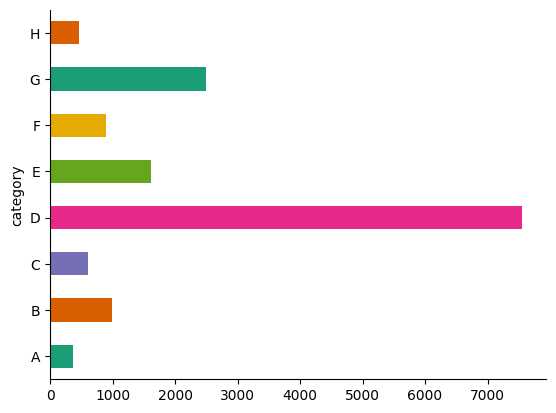

In [11]:
# @title category
from matplotlib import pyplot as plt
import seaborn as sns
data_train.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
data_train.shape

(14999, 9)

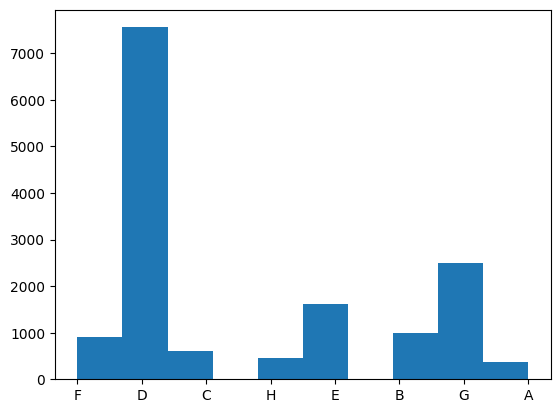

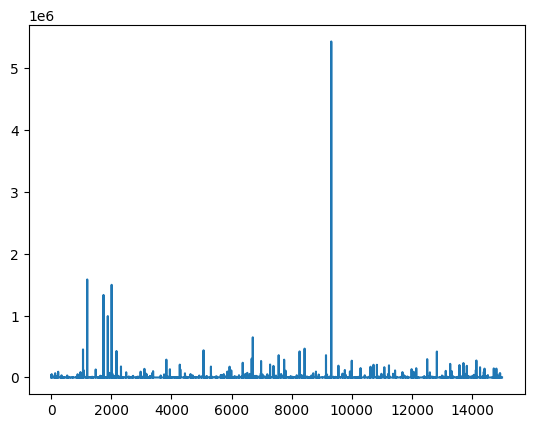

In [13]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [15]:
data_train = data_train[data_train["adview"] <2000000]

In [16]:
data_train['comment'] = data_train['comment'].replace('F', np.nan)

<ipython-input-16-04723df5ff25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['comment'] = data_train['comment'].replace('F', np.nan)


In [17]:
data_train_numeric = data_train.drop(['vidid', 'category','published','duration'], axis=1)
data_train_numeric

,adview,views,likes,dislikes,comment
0,40,1031602,8523,363,1095
1,2,1707,56,2,6
2,1,2023,25,0,2
3,6,620860,777,161,153
4,1,666,1,0,0
...,...,...,...,...,...
14994,2,525949,1137,83,86
14995,1,665673,3849,156,569
14996,4,3479,16,1,1
14997,1,963,0,0,0


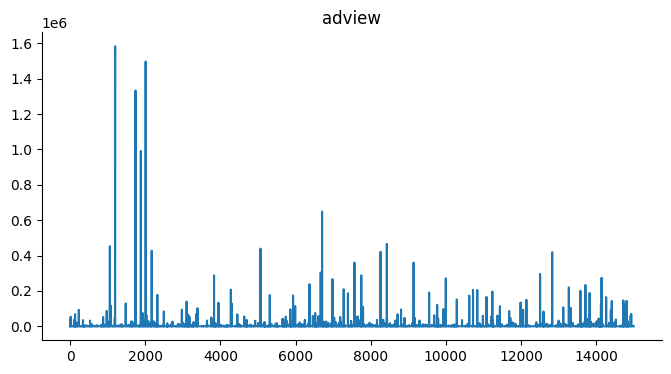

In [18]:
# @title adview

from matplotlib import pyplot as plt
data_train_numeric['adview'].plot(kind='line', figsize=(8, 4), title='adview')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
data_train_numeric = data_train_numeric.apply(pd.to_numeric, errors='coerce')

# Remove rows where conversion to integer failed (rows with NaN values)
data_train_numeric = data_train_numeric.dropna()

# Convert the entire DataFrame to integer type
data_train_numeric = data_train_numeric.astype(int)

# Print the DataFrame after conversion
data_train_numeric.dtypes

adview      int64
views       int64
likes       int64
dislikes    int64
comment     int64
dtype: object

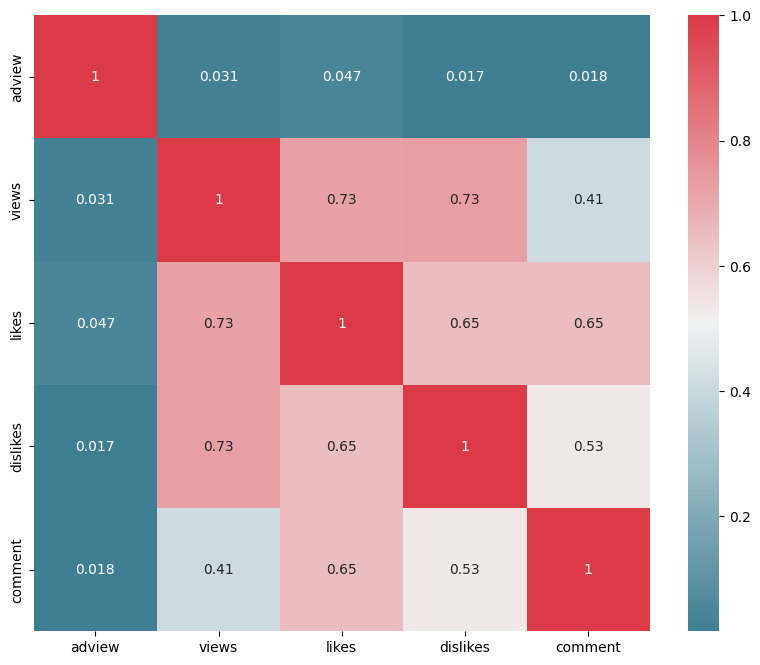

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train_numeric.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [22]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [23]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [24]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


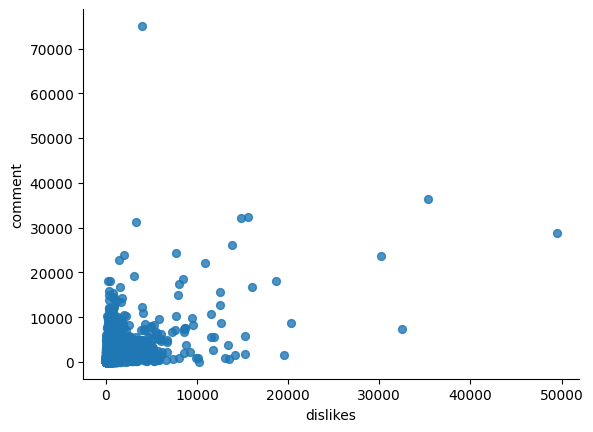

In [27]:
# @title dislikes vs comment

from matplotlib import pyplot as plt
data_train.plot(kind='scatter', x='dislikes', y='comment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

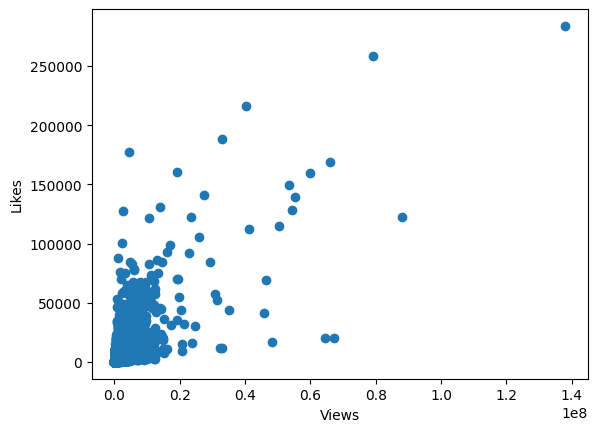

In [26]:
# @title Likes vs Views

import matplotlib.pyplot as plt
plt.scatter(data_train['views'], data_train['likes'])
plt.xlabel('Views')
_ = plt.ylabel('Likes')

In [25]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [28]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

In [29]:
train=pd.read_csv("/content/train - train.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5996,40,1031602,8523,363,1095.0,2169,457,6
1,2799,2,1707,56,2,6.0,2186,570,4
2,8231,1,2023,25,0,2.0,2095,136,3
3,9098,6,620860,777,161,153.0,2120,262,8
4,123,1,666,1,0,0.0,2092,31,4


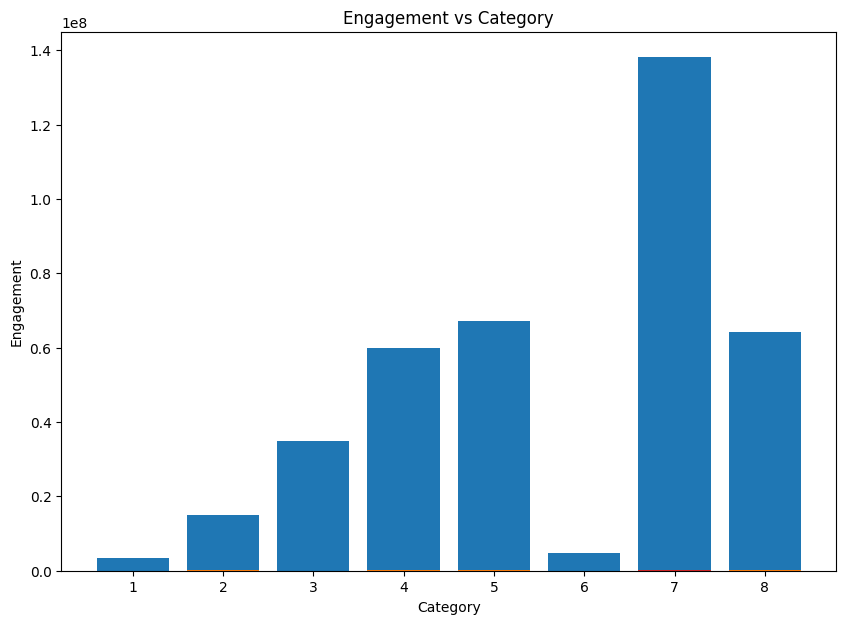

In [31]:
# @title Engagement vs Category

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.bar(data_train['category'], data_train['views'])
plt.bar(data_train['category'], data_train['likes'])
plt.bar(data_train['category'], data_train['dislikes'])
plt.bar(data_train['category'], data_train['comment'])
plt.xlabel('Category')
plt.ylabel('Engagement')
_ = plt.title('Engagement vs Category')

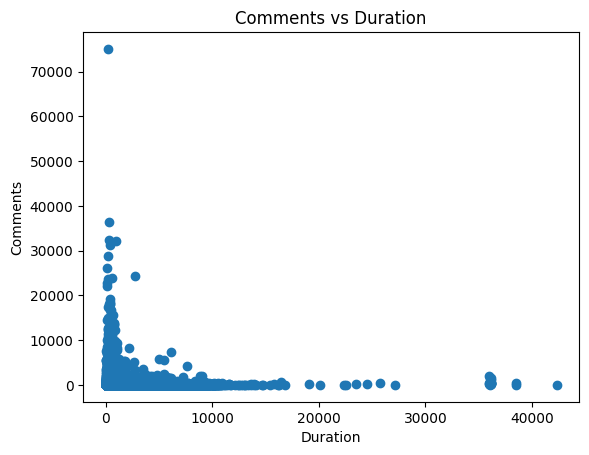

In [30]:
# @title Comments vs Duration

import matplotlib.pyplot as plt
plt.scatter(data_train['duration'], data_train['comment'])
plt.title('Comments vs Duration')
plt.xlabel('Duration')
_ = plt.ylabel('Comments')

In [32]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

(11872, 7)

In [33]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

nan

In [34]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Impute missing values in training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [36]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_imputed, y_train)

LinearRegression()

In [37]:
# Evaluate the model
print_error(X_test_imputed, y_test, linear_regression)

Mean Absolute Error: 3445.2152521528565
Mean Squared Error: 323071428.4128711
Root Mean Squared Error: 17974.187837364756


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Impute missing values in training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [39]:
# Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_imputed, y_train)
print_error(X_test_imputed, y_test, decision_tree)

Mean Absolute Error: 3361.019198383294
Mean Squared Error: 1553826172.6736274
Root Mean Squared Error: 39418.60186096949


In [40]:
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train_imputed, y_train)
print_error(X_test_imputed, y_test, random_forest)

<ipython-input-40-3afce2c9df63>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_imputed, y_train)


Mean Absolute Error: 2721.98664668174
Mean Squared Error: 273766596.5972395
Root Mean Squared Error: 16545.893647586385


In [41]:
data_train.columns

Index(['views', 'likes', 'dislikes', 'comment', 'published', 'duration',
       'category'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import keras
from keras.layers import Dense

X = data_train_numeric.drop(columns=['adview'])  # Features
y = data_train_numeric['adview']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Impute missing values in testing data
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

In [43]:
ann = keras.models.Sequential([
    Dense(6, activation="relu", input_shape=X_train.shape[1:]),
    Dense(6, activation="relu"),
    Dense(1)
])

optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])

In [44]:
# Train the model
history = ann.fit(X_train, y_train, epochs=100, verbose=1)
# Print the model summary
ann.summary()

Epoch 1/100
366/366 [==============================] - 5s 4ms/step - loss: 767406912.0000 - mean_squared_error: 767406912.0000
Epoch 2/100
366/366 [==============================] - 2s 5ms/step - loss: 767404736.0000 - mean_squared_error: 767404736.0000
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 767401536.0000 - mean_squared_error: 767401536.0000
Epoch 4/100
366/366 [==============================] - 1s 3ms/step - loss: 767395520.0000 - mean_squared_error: 767395520.0000
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 767384960.0000 - mean_squared_error: 767384960.0000
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 767369216.0000 - mean_squared_error: 767369216.0000
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 767348672.0000 - mean_squared_error: 767348672.0000
Epoch 8/100
366/366 [==============================] - 1s 3ms/step - loss: 767321984.0000 - mean_squared_error:

In [45]:
# Define a function to print error metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

# Print error metrics
print_error(X_test_imputed, y_test, ann)

92/92 [==============================] - 0s 3ms/step
Mean Absolute Error: 3250.567385397322
Mean Squared Error: 832374131.0329273
Root Mean Squared Error: 28850.894804718402


In [46]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
dtt = pd.read_csv("/content/train - train.csv")

In [54]:
dtt.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [55]:
from keras.models import load_model
model = load_model("/content/ann_youtubeadview.h5")

In [56]:
dtt=dtt[dtt.likes!='F']
dtt=dtt[dtt.dislikes!='F']
dtt=dtt[dtt.comment!='F']
dtt=dtt[dtt.views!='F']

In [57]:
dtt.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [59]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dtt["category"]=dtt["category"].map(category)
dtt.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [61]:
# Convert values to integers for views, likes, comments, dislikes and adview
dtt["views"] = pd.to_numeric(dtt["views"])
dtt["comment"] = pd.to_numeric(dtt["comment"])
dtt["likes"] = pd.to_numeric(dtt["likes"])
dtt["dislikes"] = pd.to_numeric(dtt["dislikes"])
column_vidid=dtt['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
dtt['duration']=LabelEncoder().fit_transform(dtt['duration'])
dtt['vidid']=LabelEncoder().fit_transform(dtt['vidid'])
dtt['published']=LabelEncoder().fit_transform(dtt['published'])
dtt.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


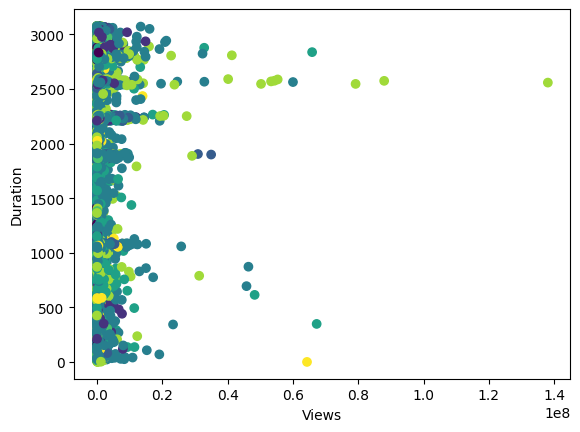

In [62]:
# @title Views vs Duration

import matplotlib.pyplot as plt
plt.scatter(dtt['views'], dtt['duration'], c=dtt['category'])
plt.xlabel('Views')
_ = plt.ylabel('Duration')

In [63]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp


train=pd.read_csv("/content/train - train.csv")
mp = pd.read_csv("/content/train - train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

dtt["duration"]=time1
dtt.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


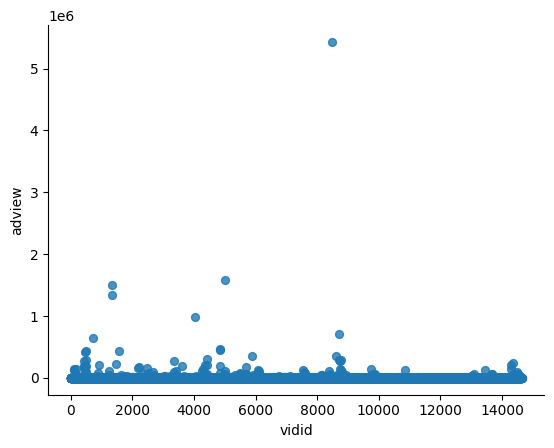

In [65]:
# @title vidid vs adview

from matplotlib import pyplot as plt
dtt.plot(kind='scatter', x='vidid', y='adview', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [66]:
dtt=dtt.drop(["vidid"],axis=1)
dtt.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,6
1,2,1707,56,2,6,2185,570,4
2,1,2023,25,0,2,2094,136,3
3,6,620860,777,161,153,2119,262,8
4,1,666,1,0,0,2091,31,4


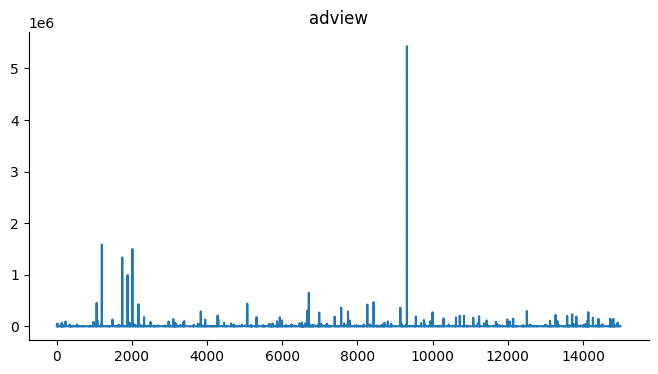

In [75]:
from matplotlib import pyplot as plt
dtt['adview'].plot(kind='line', figsize=(8, 4), title='adview')
plt.gca().spines[['top', 'right']].set_visible(False)

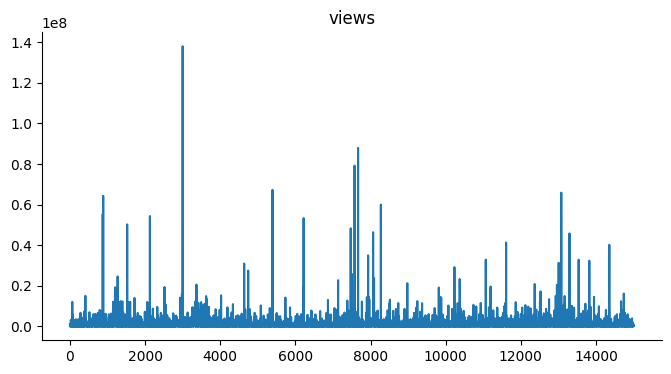

In [67]:
# @title views

from matplotlib import pyplot as plt
dtt['views'].plot(kind='line', figsize=(8, 4), title='views')
plt.gca().spines[['top', 'right']].set_visible(False)